In [118]:
import xml.etree.cElementTree as et
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 16, 8

In [119]:
path = "/home/sasdemo/apple_health_export/export.xml"
e = et.parse(path)

In [121]:
#Extract the heartrate values, and get a timestamp from the xml
# there is likely a more efficient way, though this is very fast
dt = []
v = []
for atype in e.findall('Record'):
    if atype.get('type') == "HKQuantityTypeIdentifierHeartRate":
        dt.append(datetime.strptime(atype.get("startDate"),"%Y-%m-%d %H:%M:%S %z"))
        v.append(atype.get("value"))


myd = pd.DataFrame({"Create":dt,"Value":v})
myd['Month'] = myd['Create'].apply(lambda x: x.strftime('%Y-%m'))
myd['Day'] = myd['Create'].apply(lambda x: x.strftime('%d'))
myd['Value'] = myd.Value.astype(float).astype(int)

Value    Axes(0.1,0.15;0.8x0.75)
dtype: object

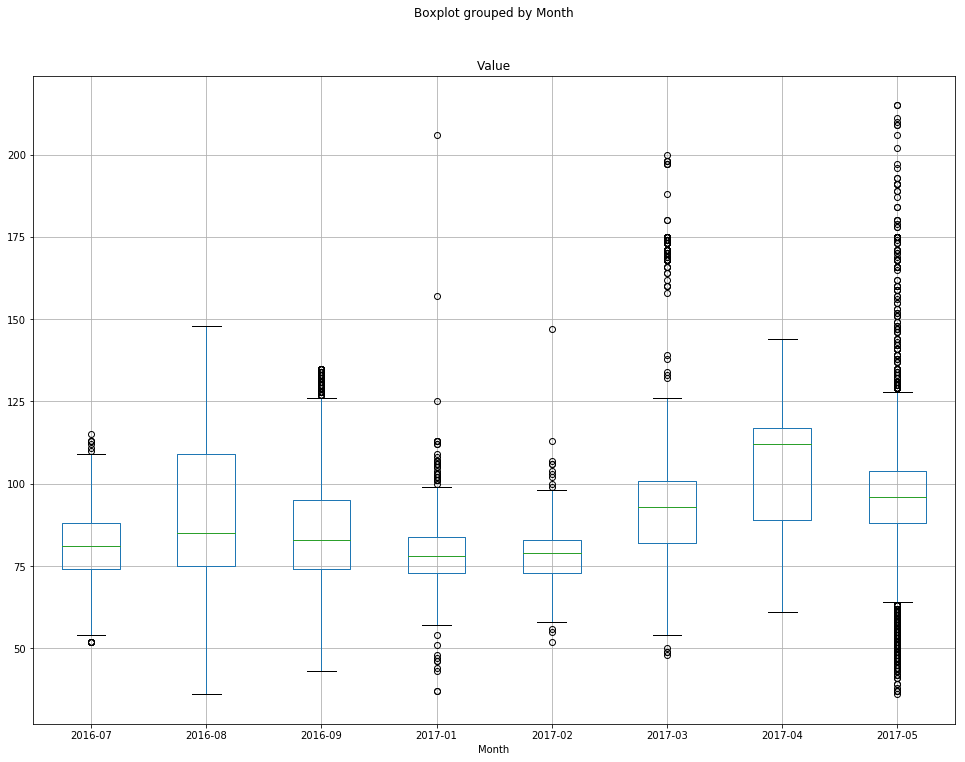

In [107]:
myd.boxplot(by='Month',column="Value", return_type='axes')

/opt/sasinside/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:5749: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)


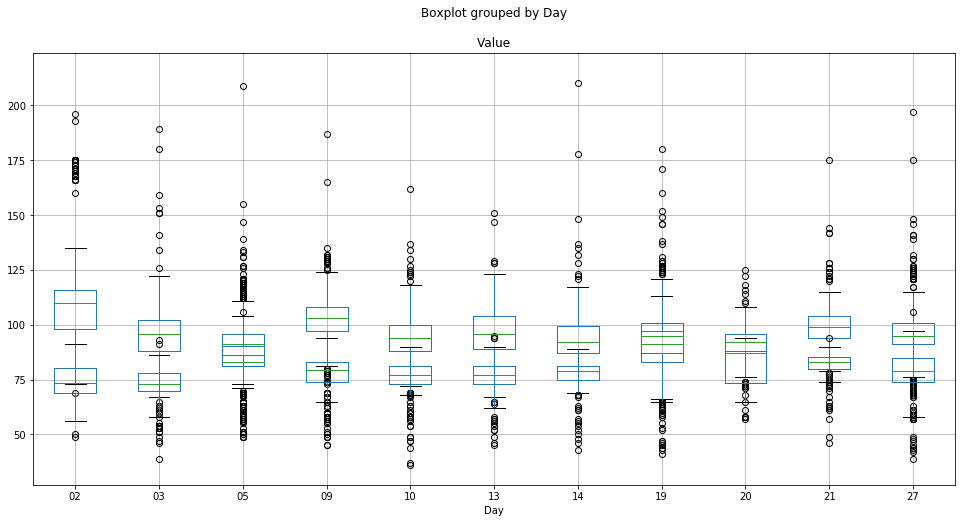

In [123]:
ax = myd[myd['Month']=='2017-05'].boxplot(by='Day',column="Value", return_type='axes')
_ = myd[myd['Month']=='2017-02'].boxplot(by='Day',column="Value", return_type='axes',ax=ax)
